#### Contexte

Pour cet exercice, je vous demande simplement de refaire ce que nous avons fait dans le chapitre sur le problème de Monty Hall, mais en utilisant cette fois Numpy.  Vous allez donc simuler le problème de Monty Hall, et visualiser les résultats de vos simulations. Vous devrez assembler les deux fonctions ```play_game``` et ```play``` au sein d'une même fonction. Cette fonction devra générer un tableau Numpy des gains du joueur, et non pas une ```list```. 

Vous ne devrez pas faire appel à la librairie ```random``` de Python (mais vous utiliserez la librairie ```random``` de Numpy). 

Votre code ne doit pas comporter de boucle (pas de ```for```) dans la partie calculatoire. Pour cela, vous devrez sûrement vous creuser un peu la tête. N'oubliez pas que Numpy peut très rapidement comparer les éléments de deux tableaux un à un. 

Vous devrez intégrer cette fonction dans un module Python. Votre notebook ne doit comporter aucune définition de fonction.

Votre notebook doit s'exécuter et générer les mêmes graphiques que ceux du cours.
<br>
<br>
#### Consigne

1. Un fichier .py doit accompagner le notebook, avec à l'intérieur la définition d'une fonction.
2. Le notebook doit utiliser la fonction du module pour simuler le jeu.
3. La fonction ou le notebook ne doivent pas importer le module random (mais numpy.random), ou tout au moins ne pas l'utiliser.
4. Les graphiques du chapitre doivent être reproduits (attention, nous faisons appels à des variables aléatoires, donc les graphiques ne seront pas forcément identiques).
5. Le notebook doit être bien segmenté (tout le code ne doit pas être dans une seule cellule).
6. Toutes les cellules doivent s'exécuter sans erreur (il faut les exécuter dans l'ordre !).

# 0. Set Up Environment and Download Data

In [24]:
# import libraries
from numpy.random import randint
import matplotlib.pyplot as plt

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

In [3]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2

In [12]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
# seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

In [22]:
def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    # Ceci est une liste en compréhension. Pour en savoir plus, consulter 
    # le cours "Apprenez à programmer en Python" sur OpenClassrooms
    return np.fromiter((1 if play_game(strategie) else 0 for i in range(nb_tours)), int)
#     return array(1 if play_game(strategie) else 0 for i in range(nb_tours))

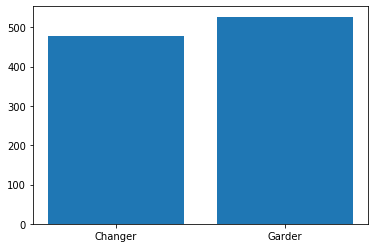

In [28]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 1000)), 
               sum(play(Strategie.GARDER, 1000))], 
        tick_label=["Changer","Garder"])